<a href="https://colab.research.google.com/github/annisayovinda/Final-Project-DS-Rakamin-31/blob/main/Final_Project_Batch_31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rakamin Final Project Batch 31

In [ ]:
# Import Libraries
import numpy as np 

import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 99)
from scipy.stats import chi2_contingency

import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

In [ ]:
# Import Data
data = '/Users/asadurrahmanalqayyim/Documents/Rakamin/Batch 31/Final Project/Dataset/train.csv'
df = pd.read_csv(data,delimiter=',', encoding='utf-8')

### Exploratory Data Analysis

#### Descriptive Analysis

In [ ]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [ ]:
print(df.columns)

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')


In [ ]:
df.shape

(10999, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


Nama kolom dan tipe sudah sesuai. 
Terdapat:
- 8 numerical collumns (ID, Customer_care_calls, Customer_rating, Cost_of_the_Product, Prior_purchases, Discount_offered, Weight_in_gms, Reached.on.Time_Y.N)
- 4 categorical collumns (warehouse_block, mode_of_shipment,Product_importance,Gender)

In [ ]:
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

Tidak terdapat nilai kosong (NaN) pada dataset ini.

#### Data Explanation

- 1 - ID (numeric)
- 2 - Warehouse_block : the Allocation of the Warehouse (categorical: "A","B","C","D","E","F")
- 3 - Mode_of_Shipment : Type of Shipment (categorical: "Flight","Road","Ship")
- 4 - Customer_care_calls: Amount of Customer Care Calls (ordinal: "1","2","3","4", "5")
- 5 - Customer_rating: Score of Customer (ordinal: "1","2","3","4","5")
- 6 - Cost_of_the_Product: Product Cost (numeric)
- 7 - Prior_purchases: Priority of Purchases (ordinal: "1","2","3","4","5","6","7","8","9","10")
- 8 - Product_importance: (ordinal: "low","medium", "high")
- 9 - Gender: Type of Gender (binary: "M","F")
- 10 - Discount_offered: Discount in Percentage (numeric)
- 11 - Weight_in_gms: Weight of Product in Grams (numeric)

#### Output variable (desired target):
- 12 - Reached.on.Time_Y.N: Delivery on Time (binary: "1", "0")

In [ ]:
# Duplicate Values
duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")

Duplicate Rows :


- Tidak terdeteksi nilai duplikat

In [ ]:
# Define Target Variable
df['Reached.on.Time_Y.N'].value_counts(normalize=True)

1    0.596691
0    0.403309
Name: Reached.on.Time_Y.N, dtype: float64

- Data set ini mempunyai 2 unique values sebagai outcome untuk target variable (yes atau no).
- Terdapat imbalance yang nantinya bisa dilakukan oversampling / undersampling

In [ ]:
# Numeric Variables
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


- Standar Deviasi di sebagian besar kolom numerik > 1 artinya terdapat rentang variasi data yang lebar. Sedangkan untuk 2 dari 8 kolom numerik merupakan identifier collumns dan binary collumn.

In [ ]:
# Categorical Variables
df.describe(include='object')

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


Pada kolom 'warehouse_block' terdapat nilai kategorik terbilang banyak sehingga pada tahap preprocessing memerlukan feature encoding dengan metode One-hots encoding.

In [ ]:
# Numerical & Categorical Seperation
num_dtypes = ['int16', 'int32', 'int64', 'float', 'float16', 'float16', 'float32', 'float64']
num_df = df.select_dtypes(include = num_dtypes)
numerical = num_df.columns

cat_dtypes = ['object']
cat_df = df.select_dtypes(include = cat_dtypes)
categorical = cat_df.columns

print(numerical)
print(categorical)

Index(['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')
Index(['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], dtype='object')


- 8 variables pada kolom numerikal
- 4 variables pada kolom kategorical

In [ ]:
for col in categorical:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Warehouse_block:
F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64

Value count kolom Mode_of_Shipment:
Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64

Value count kolom Product_importance:
low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64

Value count kolom Gender:
F    5545
M    5454
Name: Gender, dtype: int64



- 'Warehouse_block': The values of this variable are evenly distributed across 5 categories, with each category containing approximately the same number of observations. There does not appear to be any issues with this variable.

- 'Mode_of_Shipment': The majority of observations were shipped by 'Ship' mode, while the remaining observations were almost equally divided between 'Flight' and 'Road' modes. This variable does not appear to have any issues with uneven distribution.

- 'Product_importance': The majority of products were classified as having 'low' importance, with 'medium' importance being the next most frequent category and 'high' importance being the least frequent. This variable is also imbalanced, with only a small proportion of products being classified as having high importance.

- 'Gender': The number of male and female customers in the dataset is almost the same, with each gender comprising approximately half of the observations. There does not appear to be any issues with this variable.

#### Univariate Analysis

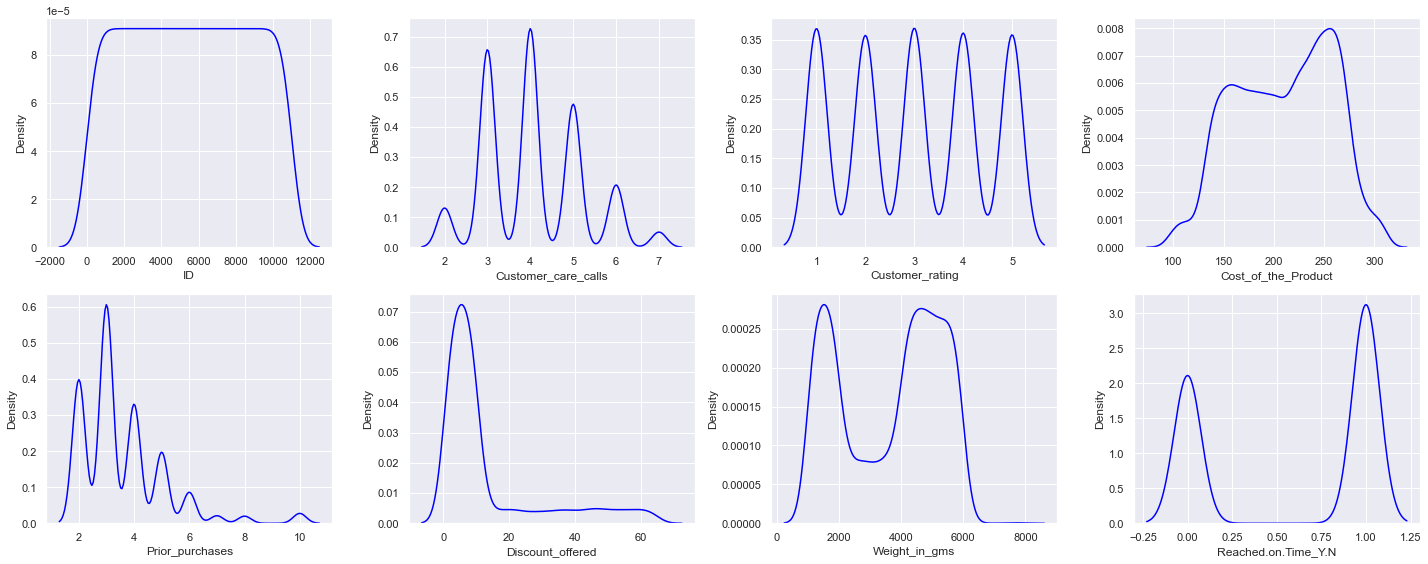

In [ ]:
# Displot (Numerical)
features_num = numerical
plt.figure(figsize=(20,8))
for i in range(0, len(numerical)):
    plt.subplot(2, 4, i+1)
    sns.kdeplot(x=df[features_num[i]], color = 'blue')
    plt.tight_layout()

- Terdapat fitur yang tidak terdistribusi normal seperti Discount_offered yang memiliki kecenderungan right-skewed (right long tailed). Untuk fitur ini perlu dilakukan log transfrmation agar lebih mendekati distribusi normal.

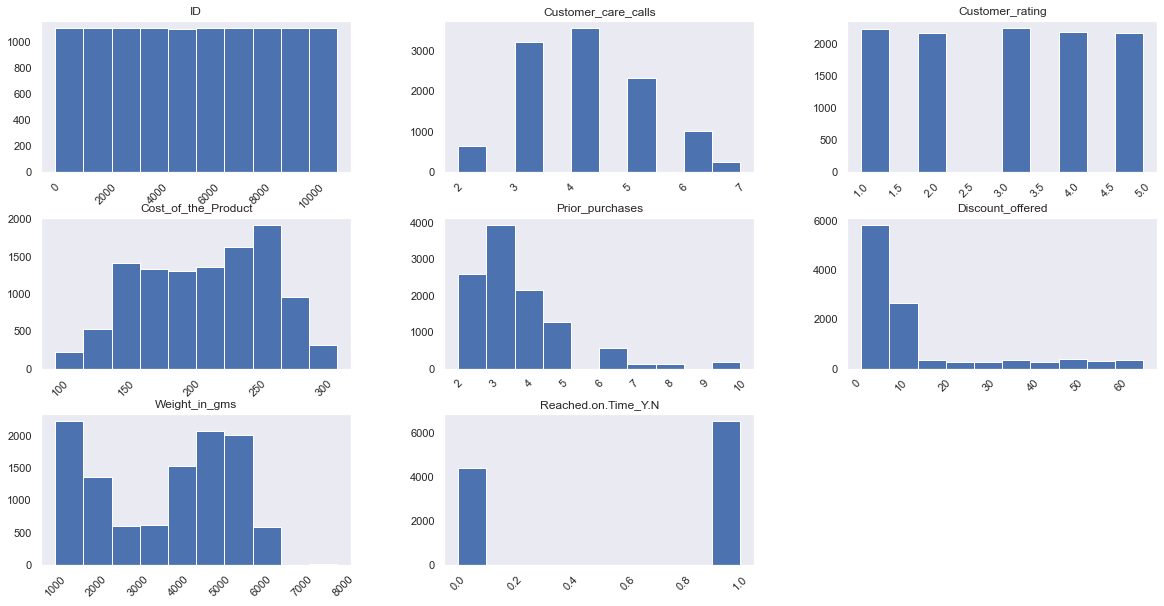

In [ ]:
# Histogram (Numerical)
df.hist(figsize=(20,10), xrot=45, grid=False)
plt.show()

- Pada plot histogram lebih terlihat jelas melaui bin pada masing-masing fitur, tidak terdistribusi normal dan cenderung right-skewed (right long tailed). Fitur Discount_offered perlu dilakukan log transfrmation agar lebih mendekati distribusi normal.

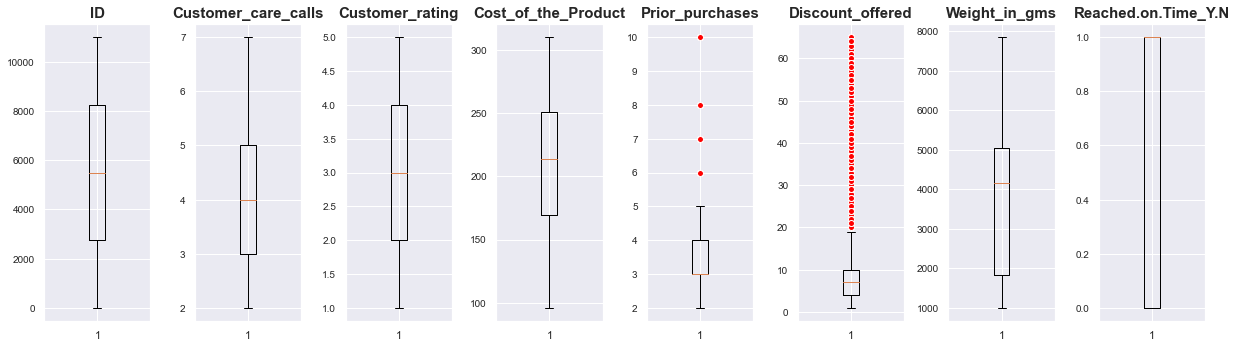

In [ ]:
# Boxplot (Numerical)
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(1, len(numerical), figsize=(17,5))

for i, ax in enumerate(axs.flat):
  ax.boxplot(df[numerical].iloc[:,i], flierprops=red_circle)
  ax.set_title(df[numerical].columns[i], fontsize=15, fontweight='bold')
  ax.tick_params(axis='y', labelsize=10)    
plt.tight_layout()

- Pada grafik boxplot, terlihat beberapa fitur yang memiliki outlier, yaitu nilai ekstrem yang melewati nilai limit tertinggi dan terendah dari suatu fitur. Pada fitur Prior_purchases & Discount_offered memiliki outlier, nantinya outlier perlu dilakukan penanganan melalui z-score.

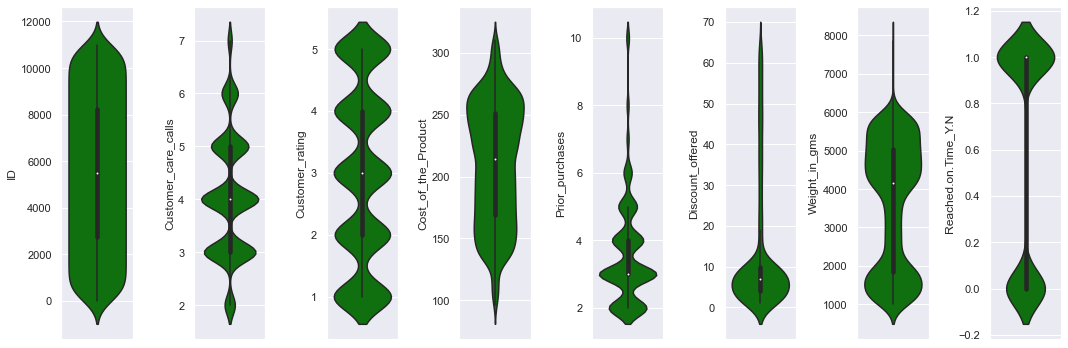

In [ ]:
# Violin Plot 
plt.figure(figsize=(15, 5))
for i in range(0, len(numerical)):
    plt.subplot(1, len(numerical), i+1)
    sns.violinplot(y=df[numerical[i]], color='green', orient='v')
    plt.tight_layout()

<Figure size 1080x864 with 0 Axes>

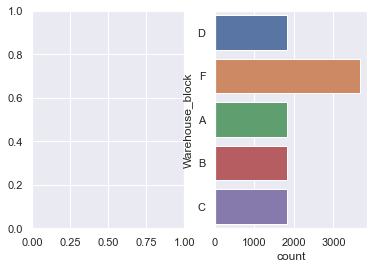

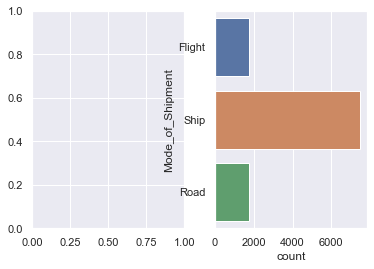

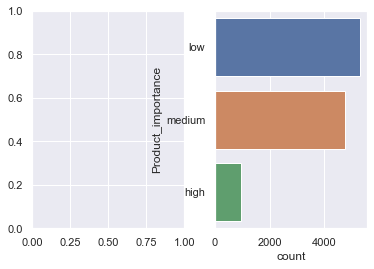

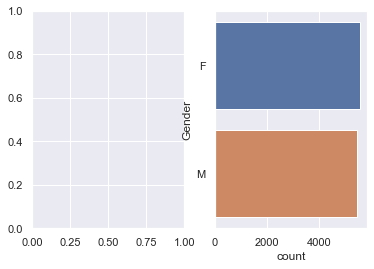

In [ ]:
# Barplot (Categorical)
plt.figure(figsize=(15, 12))
for column in df.select_dtypes(include='object'):
    if df[column].nunique() < 16:
       fig, ax =plt.subplots(1,2)
    sns.countplot(y=column, data=df)
    plt.show()

- ##### Grafik Warehouse_block 
Memiliki 5 regional gudang yang dimana 4 diantaranya sama banyak dan blok F merupakan regional paling banyak
- ##### Mode_of_shipment 
Pengiriman paling terbanyak menggunakan transportasi kapal sedangkan untuk transportasi darat sama banyaknya dengan transportasi udara
- ##### Product_importance
Low merupakan status yang paling banyak dari segi kepentingan paket, disusul dengan medium dan terdapat jurang bar untuk status high
- ##### Gender
antara male dan female memiliki nilai sama banyak

#### Multivariate Analysis

In [ ]:
df['Reached.on.Time_Y.N'] = df['Reached.on.Time_Y.N'].astype('category').cat.codes
df.sample(3)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
338,339,A,Ship,3,5,261,3,medium,M,15,2989,1
8445,8446,B,Ship,3,5,142,2,low,M,6,5974,1
2138,2139,A,Ship,2,3,140,2,medium,M,20,1832,1


In [ ]:
df.corr()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,1.000000,0.188998,-0.005722,0.196791,0.145369,-0.598278,0.278312,-0.411822
Customer_care_calls,0.188998,1.000000,0.012209,0.323182,0.180771,-0.130750,-0.276615,-0.067126
Customer_rating,-0.005722,0.012209,1.000000,0.009270,0.013179,-0.003124,-0.001897,0.013119
Cost_of_the_Product,0.196791,0.323182,0.009270,1.000000,0.123676,-0.138312,-0.132604,-0.073587
Prior_purchases,0.145369,0.180771,0.013179,0.123676,1.000000,-0.082769,-0.168213,-0.055515
Discount_offered,-0.598278,-0.130750,-0.003124,-0.138312,-0.082769,1.000000,-0.376067,0.397108
Weight_in_gms,0.278312,-0.276615,-0.001897,-0.132604,-0.168213,-0.376067,1.000000,-0.268793
Reached.on.Time_Y.N,-0.411822,-0.067126,0.013119,-0.073587,-0.055515,0.397108,-0.268793,1.000000


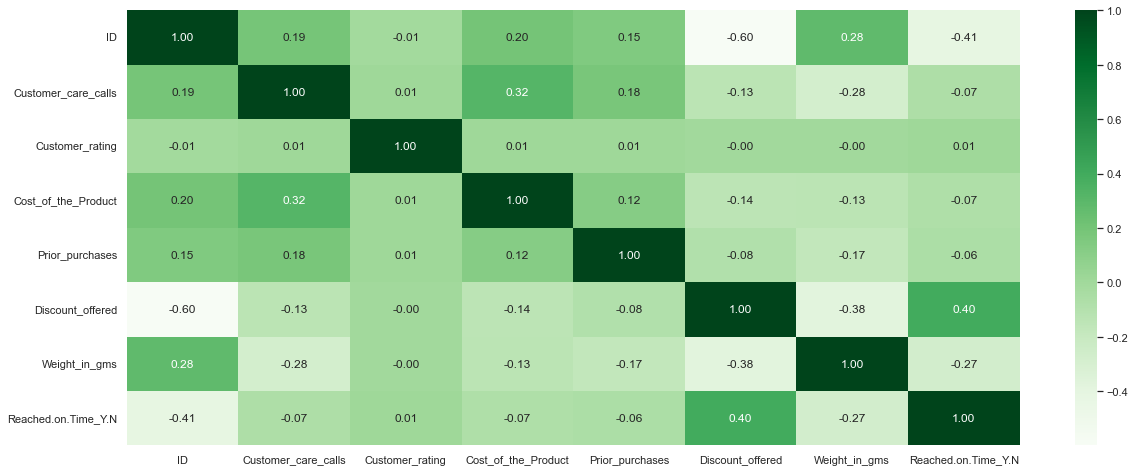

In [ ]:
plt.figure(figsize=(20, 8))
sns.heatmap(df.corr(), cmap='Greens', annot=True, fmt='.2f')
plt.show()

- Tidak ada korelasi antar fitur non target.
- Terdapat korelasi positif yang bersifat moderat antara fitur "Discount_offered" dengan "Reached.on.Time_Y.N" sebagai target
- Tidak terdapat fitur yang redundan.

<Figure size 1080x1080 with 0 Axes>

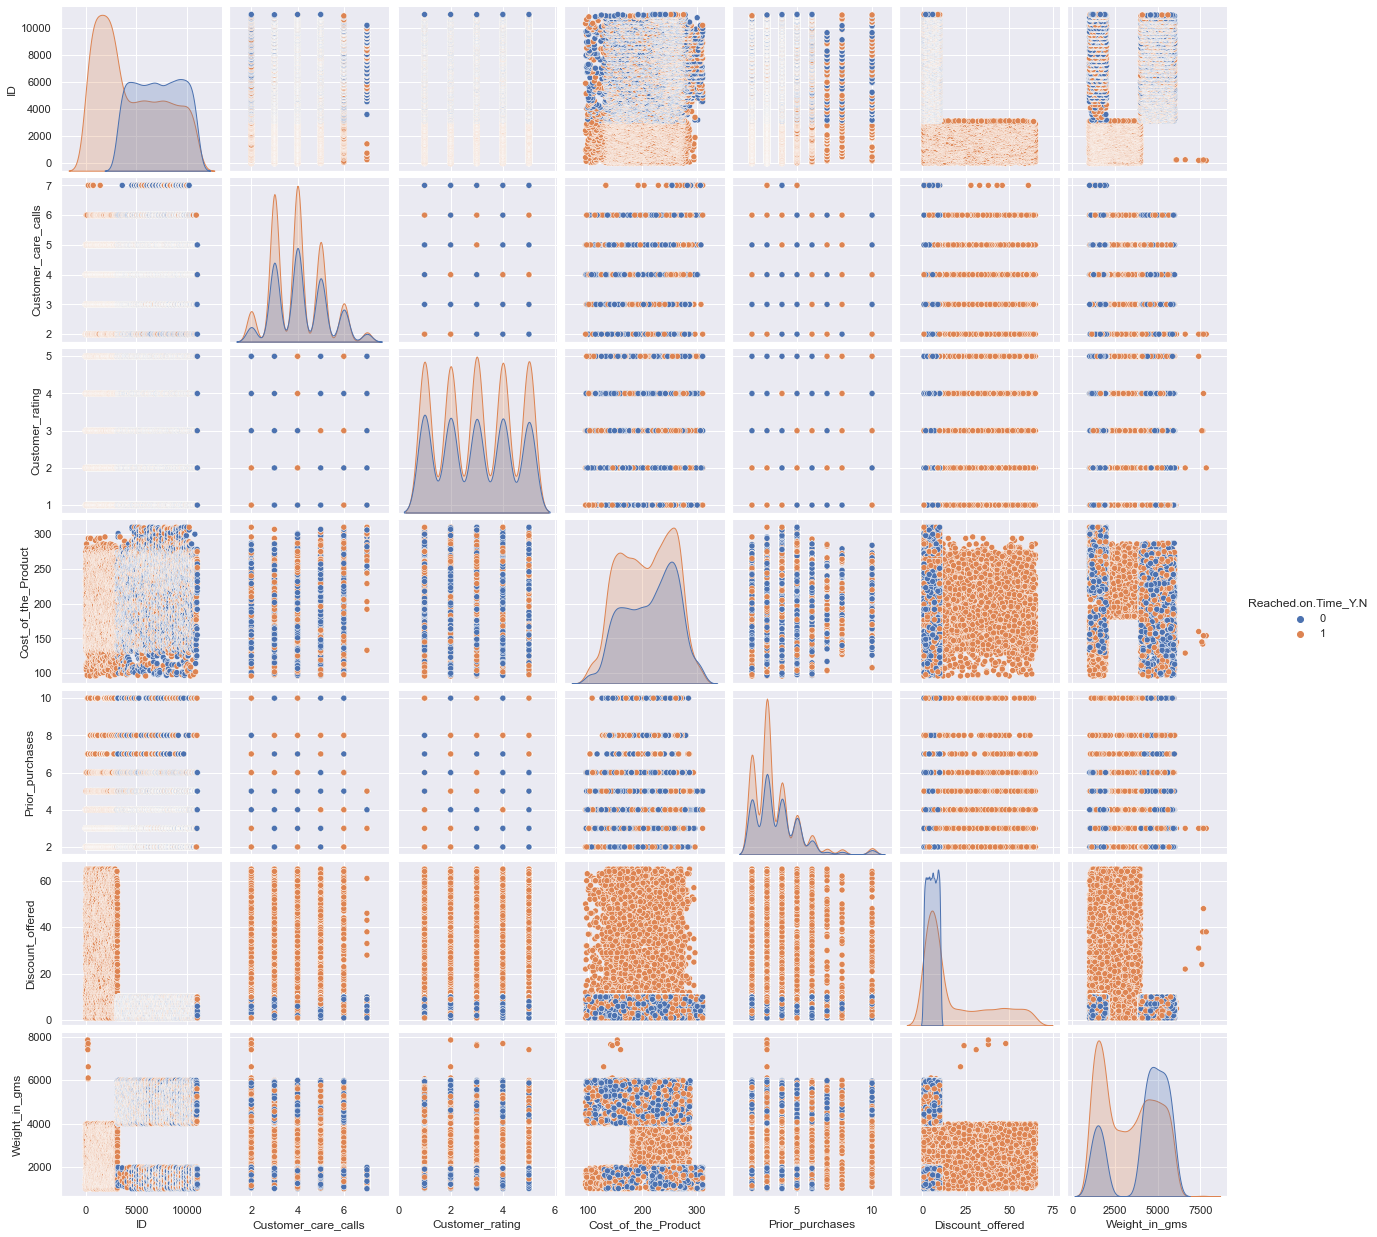

In [ ]:
# Pair Plots
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde', hue='Reached.on.Time_Y.N')

#### Visualization and Insight

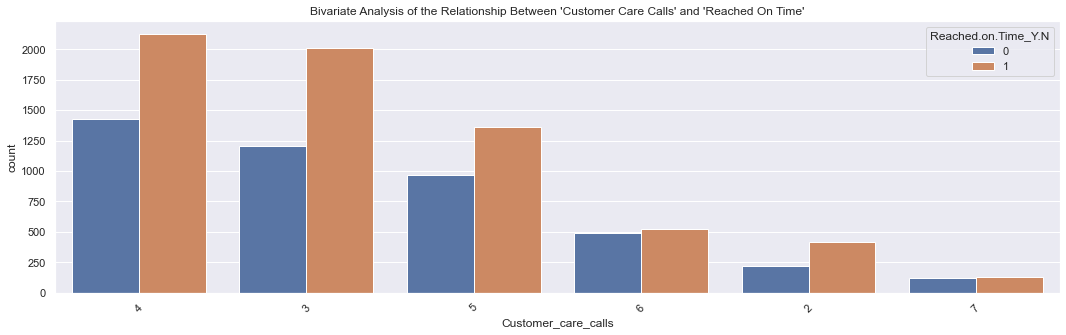

In [ ]:
# Customer Care Calls
sns.set(rc = {'figure.figsize':(18, 5)})
job = sns.countplot(x="Customer_care_calls", data = df, hue = "Reached.on.Time_Y.N", order = df["Customer_care_calls"].value_counts().index)
job.tick_params(axis='x', rotation=45)
plt.title("Bivariate Analysis of the Relationship Between 'Customer Care Calls' and 'Reached On Time'")
plt.show()

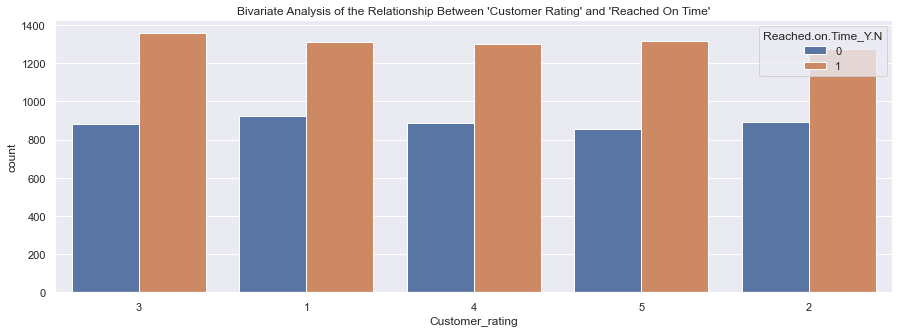

In [ ]:
# Customer Rating
sns.set(rc = {'figure.figsize':(15, 5)})
job = sns.countplot(x="Customer_rating", data = df, hue = "Reached.on.Time_Y.N", order = df["Customer_rating"].value_counts().index)
job.tick_params(axis='x')
plt.title("Bivariate Analysis of the Relationship Between 'Customer Rating' and 'Reached On Time'")
plt.show()

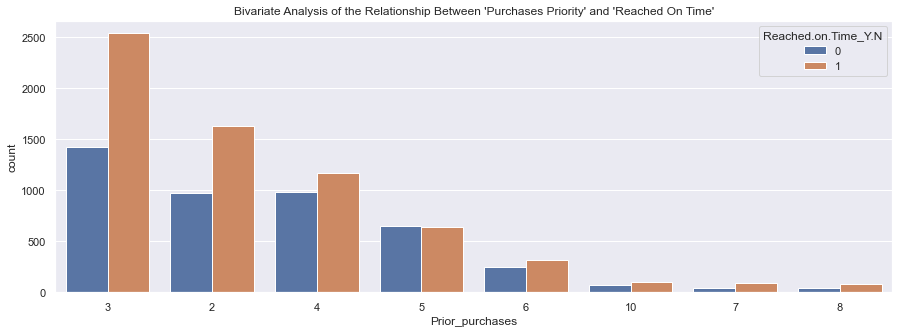

In [ ]:
sns.set(rc = {'figure.figsize':(15, 5)})
job = sns.countplot(x="Prior_purchases", data = df, hue = "Reached.on.Time_Y.N", order = df["Prior_purchases"].value_counts().index)
job.tick_params(axis='x')
plt.title("Bivariate Analysis of the Relationship Between 'Purchases Priority' and 'Reached On Time'")
plt.show()

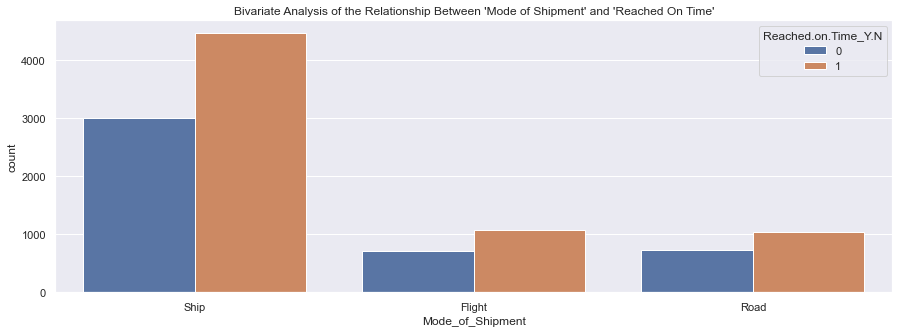

In [ ]:
sns.set(rc = {'figure.figsize':(15, 5)})
job = sns.countplot(x="Mode_of_Shipment", data = df, hue = "Reached.on.Time_Y.N", order = df["Mode_of_Shipment"].value_counts().index)
job.tick_params(axis='x')
plt.title("Bivariate Analysis of the Relationship Between 'Mode of Shipment' and 'Reached On Time'")
plt.show()

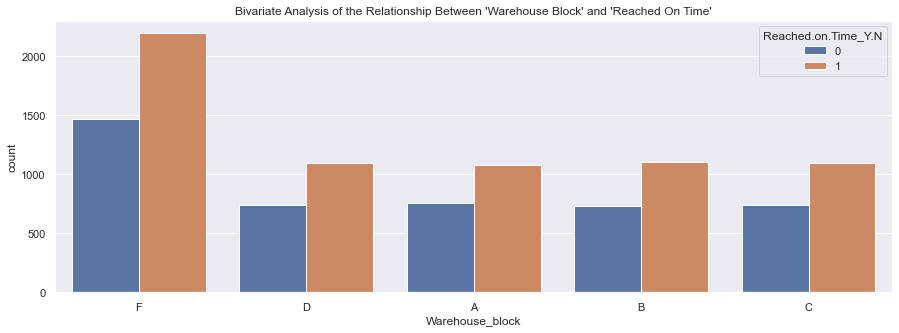

In [ ]:
sns.set(rc = {'figure.figsize':(15, 5)})
job = sns.countplot(x="Warehouse_block", data = df, hue = "Reached.on.Time_Y.N", order = df["Warehouse_block"].value_counts().index)
job.tick_params(axis='x')
plt.title("Bivariate Analysis of the Relationship Between 'Warehouse Block' and 'Reached On Time'")
plt.show()

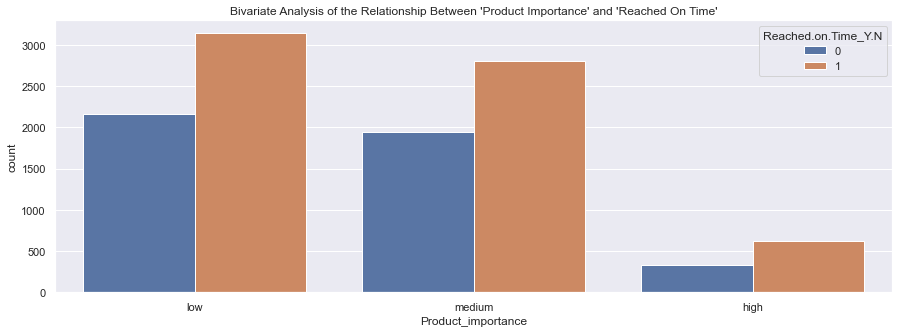

In [ ]:
sns.set(rc = {'figure.figsize':(15, 5)})
job = sns.countplot(x="Product_importance", data = df, hue = "Reached.on.Time_Y.N", order = df["Product_importance"].value_counts().index)
job.tick_params(axis='x')
plt.title("Bivariate Analysis of the Relationship Between 'Product Importance' and 'Reached On Time'")
plt.show()